## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

#load dataframe
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

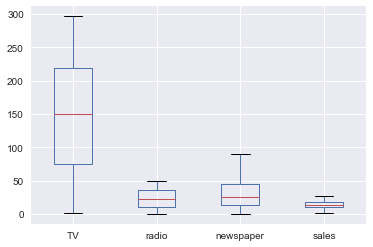

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

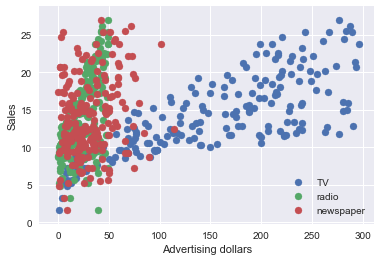

In [4]:
f1 = plt.figure()
ax1 = f1.add_subplot(111)

ax1.scatter(df['TV'],df['sales'], label = 'TV')
ax1.scatter(df['radio'],df['sales'], label = 'radio')
ax1.scatter(df['newspaper'],df['sales'], label = 'newspaper')
plt.ylabel('Sales')
plt.xlabel('Advertising dollars')
plt.legend(loc='lower right');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001607AA082B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001607B0E7240>]], dtype=object)

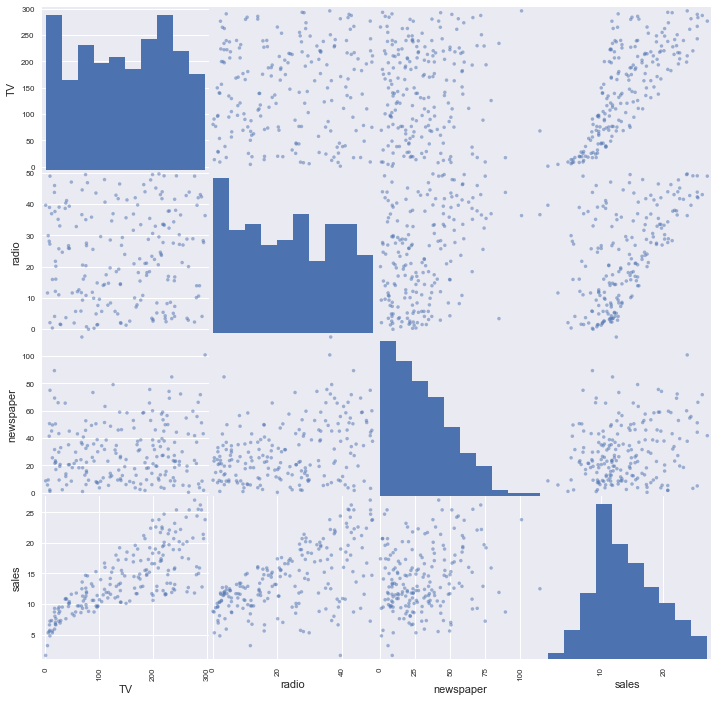

In [5]:

from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.5, figsize=(4, 4), diagonal='kde')
scatter_matrix(df,figsize=(12,12))

Which of the variables seem correlated with one another? Which don't? Explain your answer

- TV and radio correlate with sales in a positive direction while all the other variables do not correlate with each other at all. This is because of the scatterplots generated in the previous figure. The TV and radio show a trend with an increasing amount of sales while the newspaper seems to have the scatterplot points across the entire subfigure.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
# Code here
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
# Code here
X = df[['TV','radio', 'newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
# Code here
size = len(df)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
# Code here
regr = LinearRegression()
regr.fit(X_train,y_train)
print("Coefficients: ", regr.coef_)

y_new = regr.predict(X_test)
RMSE = np.mean((y_new-y_test)**2)
print("Residual sum of squares: %.2f"  %RMSE)


Coefficients:  [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
# Code here
r2 = regr.score(X_test, y_test)
print("R^2 value: ", r2)

R^2 value:  0.895478287922


- In parts d) and e), it was seen that the RMSE was found to be 2.79 and the $R^2$ value was shown to be around 0.895. The RMSE is hard to quantify in this problem because there is only one regression curve in this problem. However, the $R^2$ value is a good indicator of the performance of this regression model. Overall, a $R^2$ value of approximately 0.90 shows that 90% of the values are explained in this regression model

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

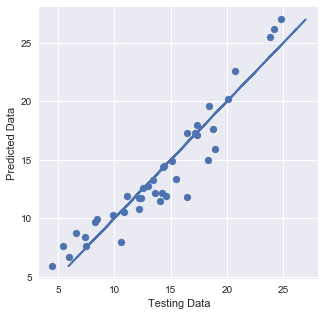

In [12]:
# Code here
plt.figure(figsize=(5,5))
plt.scatter(y_new,y_test) 
plt.plot(y_test,y_test) #slope is equal to 1 to see if above or below the testing data
plt.xlabel('Testing Data')
plt.ylabel('Predicted Data')



- Based on the graph above with a slope of 1, it looks like a good model because there are many of the data points of the testing data and the predicted data fall on or very close to the slope which indicates that this model seems to fit a linear model.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
# Code/explanation here
# Without normalizing the data, we can see the results based off the regression coefficients:
print("TV: ", regr.coef_[0])
print("Radio: ", regr.coef_[1])
print("Newspaper: ", regr.coef_[2])

#Results do not match what is expected, so we should normalize the data before making conclusions
print('Results do not match what is expected, so we should normalize the data before making conclusions')

TV:  0.0472520953737
Radio:  0.179922000177
Newspaper:  -0.000944077396472
Results do not match what is expected, so we should normalize the data before making conclusions


In [14]:
#normalized data
from sklearn import preprocessing
X1 = preprocessing.scale(X)
X_train1 = X1[0:160]
X_test1 = X1[160:]

regr1 = LinearRegression()
regr1.fit(X_train1,y_train)
print("TV: ", regr1.coef_[0])
print("Radio: ", regr1.coef_[1])
print("Newspaper: ", regr1.coef_[2])
print('Results now match after what is expected after data is normalized')


TV:  4.04663787191
Radio:  2.66458106557
Newspaper:  -0.0205092374875
Results now match after what is expected after data is normalized


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

- Overall, it is seen that the first two variables (TV and radio) have an effect and the last variable of X (newspaper) is very negligible. However, we should normalize the data for better results as indicated above and to verify this conclusion because based on the visual examination of the scatter plots of sales compared to TV or radio, TV shows a better correlation than radio. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

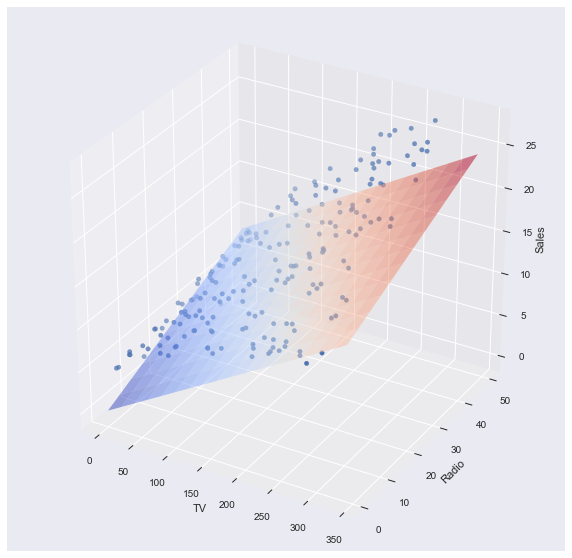

In [15]:
# Type your answer here. 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig1 = plt.figure(figsize=(10,10))

ax = fig1.add_subplot(1,1,1, projection='3d')
ax.scatter(X['TV'], X['radio'], y)

x_surface, y_surface = np.meshgrid(np.arange(0, 350, 20), np.arange(0, 50, 4))
z_surface = regr.coef_[0]*x_surface+regr.coef_[1]*y_surface #plots surface with regression coefficients from non-normalized df
ax.plot_surface(x_surface, y_surface, z_surface,cmap=cm.coolwarm, alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


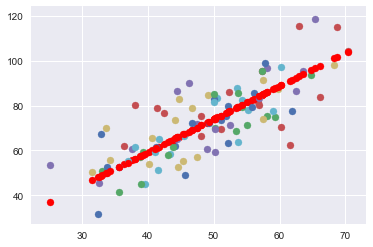

In [17]:
run(10,learning_rate = 0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


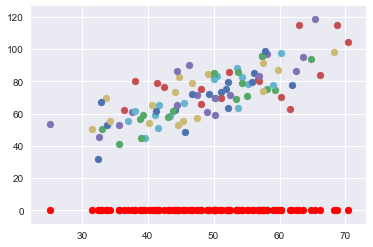

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


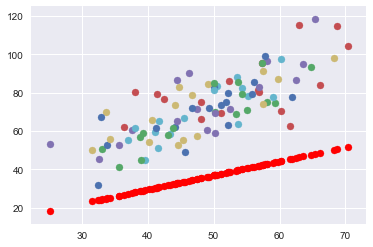

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


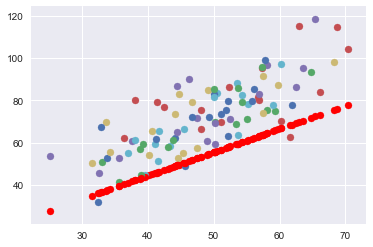

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


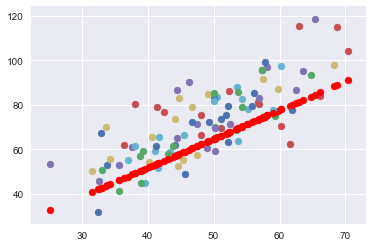

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


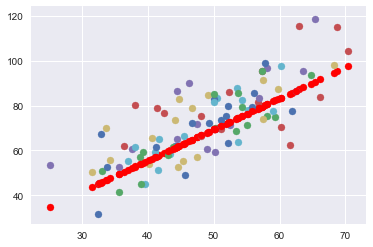

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


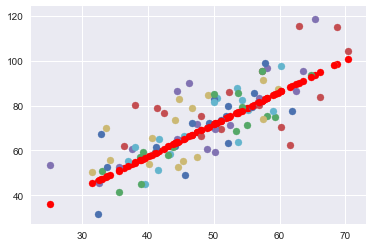

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


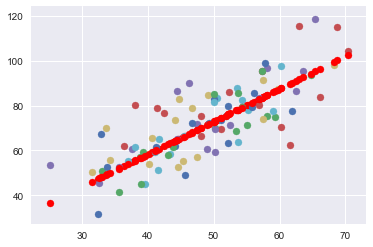

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


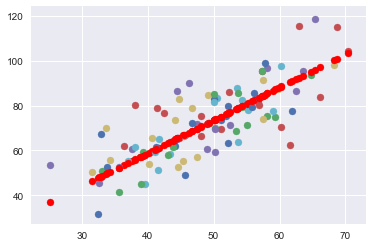

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


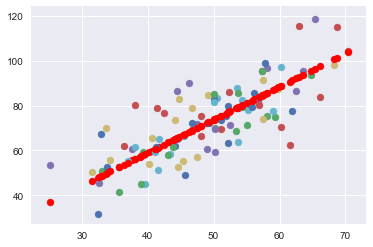

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


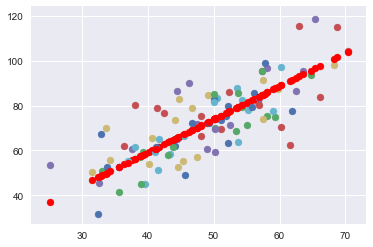

In [18]:
# Use this to visually discuss convergence rate based on learning rate
for num in range(0,10):
    run(num,learning_rate = 0.0001)
    plt.show()

In [19]:
#new run function to obtain error as a function of the number of iterations
def run(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    totalerror = compute_error_for_line_given_points(b, m, points)
    return totalerror

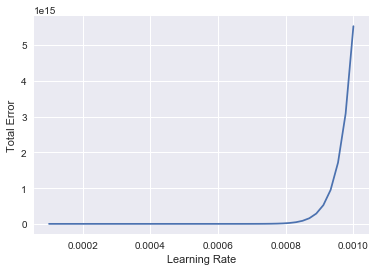

In [20]:
learning_rates = np.logspace(-4,-3,100)
errors = np.zeros(len(learning_rates))

for i in range(0,len(learning_rates)):
    errors[i] = run(10,learning_rates[i])
plt.figure()
plt.plot(learning_rates,errors)
plt.xlabel('Learning Rate')
plt.ylabel('Total Error')

- The gradient descent method minimizes the convex function. As seen in the figure above, if the learning rate is too high, the iterative method of  $\beta_{n} = \beta_{n-1}+\kappa\nabla_{\beta}\mathcal{L}\beta_{n-1}$ where $\kappa$ is the learning rate means that the iterative method results in a continuous overshoot and undershoot and fail to converge due to the fact that the step size is so large that the minimum argument is bypassed during each step. If the $\kappa$ learning rate is low, then the convergence will take longer since there is a small amount of the loss function $\mathcal{L}$ being added during each iteration leading to a larger amount of $n$ to find an acceptable solution that converges.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

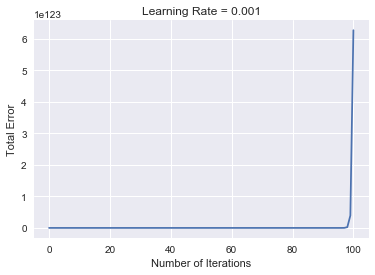

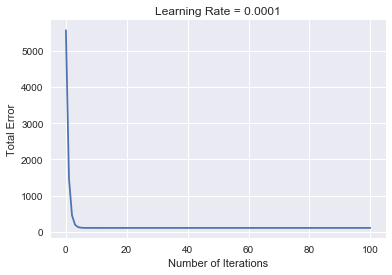

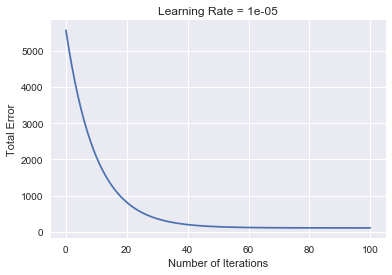

In [21]:
#shows three learning rates for 100 iterations
iterations = np.linspace(0,100,101)
iterations = np.int64(iterations)
learning_rate = np.array([0.001, 0.0001, 0.00001])
totalerror = np.zeros(101)
for i in range(0,len(iterations)):
    totalerror[i] = run(iterations[i],learning_rate[0])
plt.figure(1)
plt.plot(iterations,totalerror)
plt.xlabel('Number of Iterations')
plt.ylabel('Total Error')
plt.title('Learning Rate = %s'%(learning_rate[0]))

for i in range(0,len(iterations)):
    totalerror[i] = run(iterations[i],learning_rate[1])
plt.figure(2)
plt.plot(iterations,totalerror)
plt.xlabel('Number of Iterations')
plt.ylabel('Total Error')
plt.title('Learning Rate = %s'%(learning_rate[1]))

for i in range(0,len(iterations)):
    totalerror[i] = run(iterations[i],learning_rate[2])
plt.figure(3)
plt.plot(iterations,totalerror)
plt.xlabel('Number of Iterations')
plt.ylabel('Total Error')
plt.title('Learning Rate = %s'%(learning_rate[2]))

- As seen in the plots above, as the learning rate increases, the amount of iterations to minimize the error decrease until reaching a critical point where the gradient descent fails to converge to a similar error as the number of iterations increase as evidenced when the learning rate is 0.001 for this dataset. This therefore shows the speed of convergence and how much the learning rate has to be for convergence of the gradient descent problem. As previously mentioned, a high learning rate that does not converge means that the minimum argument is passed over during the iterative method of solving the gradient descent problem.